In [13]:
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split
from sklearn import metrics
from sklearn.preprocessing import normalize


# extension patch by intel to speed up sklearn
# from sklearnex import patch_sklearn
# patch_sklearn()
# init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
# configure pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [14]:
rs = pd.read_csv('data/rsfmri_insula_emot_reg_ders_awareness.csv')
print(rs.shape)
rs.describe()

(4090, 80)


,rsfmri_var_cdk_insulalh,rsfmri_var_cdk_insularh,rsfmri_var_cdk_rlaclatelh,rsfmri_var_cdk_rlaclaterh,rsfmri_var_cdk_entorhinallh,rsfmri_var_cdk_entorhinalrh,rsfmri_var_scs_amygdalalh,rsfmri_var_scs_amygdalarh,rsfmri_var_scs_hpuslh,rsfmri_var_scs_hpusrh,rsfmri_var_scs_putamenlh,rsfmri_var_scs_putamenrh,rsfmri_var_scs_tplh,rsfmri_var_scs_tprh,rsfmri_var_scs_ventraldclh,rsfmri_var_scs_ventraldcrh,rsfmri_var_scs_aalh,rsfmri_var_scs_aarh,mrirsfd121,mrirsfd48,mrirsfd122,mrirsfd49,mrirsfd123,mrirsfd47,rsfmri_cor_ngd_sa_scs_aalh,rsfmri_cor_ngd_sa_scs_aarh,rsfmri_cor_ngd_sa_scs_aglh,rsfmri_cor_ngd_sa_scs_agrh,rsfmri_cor_ngd_sa_scs_bs,rsfmri_cor_ngd_sa_scs_cdelh,rsfmri_cor_ngd_sa_scs_cderh,rsfmri_cor_ngd_sa_scs_crcxlh,rsfmri_cor_ngd_sa_scs_crcxrh,rsfmri_cor_ngd_sa_scs_hplh,rsfmri_cor_ngd_sa_scs_hprh,rsfmri_cor_ngd_sa_scs_pllh,rsfmri_cor_ngd_sa_scs_plrh,rsfmri_cor_ngd_sa_scs_ptlh,rsfmri_cor_ngd_sa_scs_ptrh,rsfmri_cor_ngd_sa_scs_thplh,rsfmri_cor_ngd_sa_scs_thprh,rsfmri_cor_ngd_sa_scs_vtdclh,rsfmri_cor_ngd_sa_scs_vtdcrh,rsfmri_cor_ngd_df_scs_aalh,rsfmri_cor_ngd_df_scs_aarh,rsfmri_cor_ngd_df_scs_aglh,rsfmri_cor_ngd_df_scs_agrh,rsfmri_cor_ngd_df_scs_bs,rsfmri_cor_ngd_df_scs_cdelh,rsfmri_cor_ngd_df_scs_cderh,rsfmri_cor_ngd_df_scs_crcxlh,rsfmri_cor_ngd_df_scs_crcxrh,rsfmri_cor_ngd_df_scs_hplh,rsfmri_cor_ngd_df_scs_hprh,rsfmri_cor_ngd_df_scs_pllh,rsfmri_cor_ngd_df_scs_plrh,rsfmri_cor_ngd_df_scs_ptlh,rsfmri_cor_ngd_df_scs_ptrh,rsfmri_cor_ngd_df_scs_thplh,rsfmri_cor_ngd_df_scs_thprh,rsfmri_cor_ngd_df_scs_vtdclh,rsfmri_cor_ngd_df_scs_vtdcrh,rsfmri_c_ngd_sa_ngd_ad,rsfmri_c_ngd_sa_ngd_cgc,rsfmri_c_ngd_sa_ngd_ca,rsfmri_c_ngd_sa_ngd_dt,rsfmri_c_ngd_sa_ngd_dla,rsfmri_c_ngd_sa_ngd_fo,rsfmri_c_ngd_sa_ngd_n,rsfmri_c_ngd_sa_ngd_rspltp,rsfmri_c_ngd_sa_ngd_sa,rsfmri_c_ngd_sa_ngd_smh,rsfmri_c_ngd_sa_ngd_smm,rsfmri_c_ngd_sa_ngd_vta,rsfmri_c_ngd_sa_ngd_vs,dersAWR_3_year_follow_up_y_arm_1,dersAWR_4_year_follow_up_y_arm_1,dersAWR_delta_7wave9
count,4090.000000,4090.000000,4090.000000,4090.000000,4089.000000,4089.000000,4089.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4086.000000,4090.000000,4089.000000,4090.000000,4090.000000,4090.000000,4090.000000,4086.000000,4090.000000,4083.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4086.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4083.000000,4086.000000,4090.000000,4083.000000,4090.000000,4089.000000,4090.000000,4090.000000,4089.000000,4090.000000,4090.000000,4090.000000,4090.000000,4083.000000,4090.000000,4090.000000,4086.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,0.016386,0.019800,0.054306,0.050695,0.197465,0.261215,0.046324,0.045997,0.027220,0.025496,0.028092,0.028155,0.013044,0.013692,0.027203,0.026732,0.079802,0.081572,0.054709,0.023488,0.029672,0.036202,0.044890,0.052043,0.101744,-0.056028,0.010303,0.007599,0.054351,0.121233,0.281576,0.018116,-0.070713,-0.076689,-0.005399,-0.034834,-0.003223,0.034177,0.011223,0.126000,0.123558,-0.120403,0.069914,0.056247,0.063705,-0.056858,-0.020343,0.120515,-0.056682,-0.040875,-0.011159,0.009124,0.055295,0.056888,0.115420,0.000721,0.020935,-0.049726,0.001815,-0.026902,0.051064,0.064728,0.041153,0.124874,0.097076,0.074543,-0.042793,0.080463,0.012393,-0.082773,0.390540,-0.058346,-0.028229,0.088466,-0.081527,-15.108068,-14.849389,0.258680
std,0.009573,0.010741,0.059481,0.051438,0.365270,0.477631,0.049249,0.057931,0.016206,0.014967,0.015684,0.014569,0.014080,0.015359,0.025505,0.023934,0.118763,0.170315,0.052890,0.026888,0.022352,0.018171,0.022135,0.088415,0.083110,0.094022,0.135462,0.078539,0.089702,0.112276,0.126040,0.080685,0.069858,0.091674,0.118723,0.086229,0.111749,0.075821,0.082100,0.124805,0.050507,0.077348,0.0876

#### Get column names for string and numeric columns

In [15]:
cols_stry = ['src_subject_id', 'eventname']#, 'dersAWR_4_year_follow_up_y_arm_1', 'dersAWR_3_year_follow_up_y_arm_1']
cols_num = list(set(rs.columns).difference(cols_stry))

### Drop NaN from numeric IV

In [16]:
rs = rs.dropna(subset=cols_num, axis=0)
rs.shape

(4079, 80)

#### Get column names
* separate for variance and correlation measures

In [17]:
rs_var_nm = [c for c in rs.columns if 'var' in c or 'mrirsfd' in c]
rs_cor_nm = [c for c in rs.columns if 'var' not in c and c not in cols_stry and c not in rs_var_nm]

In [18]:
# rvar = rs[rs_var_nm].corr()
# rvar = df.where(np.triu(np.ones(df.shape)).astype(np.bool))

### Remove outliers
* clearly needed because of the max values that far exceed the 75% quartile
* remove rows exceeding 3 SD

In [173]:
# rs = rs[rs.select_dtypes(include='number').apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]
# print(rs.shape)
# rs.describe()

(3324, 40)


,rsfmri_var_cdk_insulalh,rsfmri_var_cdk_insularh,rsfmri_var_cdk_rlaclatelh,rsfmri_var_cdk_rlaclaterh,rsfmri_var_cdk_entorhinallh,rsfmri_var_cdk_entorhinalrh,rsfmri_var_scs_amygdalalh,rsfmri_var_scs_amygdalarh,rsfmri_var_scs_hpuslh,rsfmri_var_scs_hpusrh,rsfmri_var_scs_putamenlh,rsfmri_var_scs_putamenrh,rsfmri_var_scs_tplh,rsfmri_var_scs_tprh,rsfmri_var_scs_ventraldclh,rsfmri_var_scs_ventraldcrh,rsfmri_var_scs_aalh,rsfmri_var_scs_aarh,mrirsfd121,mrirsfd48,mrirsfd122,mrirsfd49,mrirsfd123,rsfmri_c_ngd_sa_ngd_ad,rsfmri_c_ngd_sa_ngd_cgc,rsfmri_c_ngd_sa_ngd_ca,rsfmri_c_ngd_sa_ngd_dt,rsfmri_c_ngd_sa_ngd_dla,rsfmri_c_ngd_sa_ngd_fo,rsfmri_c_ngd_sa_ngd_n,rsfmri_c_ngd_sa_ngd_rspltp,rsfmri_c_ngd_sa_ngd_sa,rsfmri_c_ngd_sa_ngd_smh,rsfmri_c_ngd_sa_ngd_smm,rsfmri_c_ngd_sa_ngd_vta,rsfmri_c_ngd_sa_ngd_vs,dersTS_3_year_follow_up_y_arm_1,dersTS_4_year_follow_up_y_arm_1
count,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000
mean,0.015255,0.018425,0.048402,0.045028,0.144076,0.191031,0.039875,0.038220,0.025066,0.023355,0.026344,0.026309,0.011890,0.012548,0.024557,0.024253,0.063511,0.061060,0.050214,0.021543,0.027202,0.034748,0.042688,0.038867,0.123382,0.099915,0.074266,-0.043876,0.082343,0.011713,-0.086696,0.391574,-0.059638,-0.029761,0.087819,-0.081024,6.043923,4.644705
std,0.005953,0.007064,0.023544,0.022582,0.189098,0.249781,0.020775,0.023016,0.009448,0.008761,0.009661,0.009612,0.005527,0.006008,0.013384,0.013302,0.040729,0.042792,0.022127,0.010115,0.013402,0.013951,0.016900,0.068971,0.064780,0.097501,0.059261,0.060513,0.061024,0.032639,0.086918,0.119224,0.057812,0.075330,0.063231,0.063565,16.191355,15.243686
min,0.001179,0.001418,0.011036,0.008466,0.008767,0.007145,0.007579,0.005823,0.005293,0.002435,0.004186,0.002873,0.000869,0.000962,0.004750,0.004837,0.010388,0.009562,0.008098,0.004496,0.005422,0.004269,0.004615,-0.177994,-0.062583,-0.206296,-0.107528,-0.237226,-0.114337,-0.092627,-0.365847,0.002543,-0.250498,-0.279181,-0.093389,-0.288336,-19.000000,-19.000000
25%,0.010995,0.013222,0.032951,0.030612,0.039282,0.045997,0.026570,0.024264,0.018420,0.017386,0.019389,0.019366,0.008263,0.008660,0.015280,0.015196,0.041071,0.038890,0.034955,0.014462,0.017782,0.024502,0.030250,-0.006154,0.080017,0.032788,0.033709,-0.083826,0.041238,-0.010082,-0.143305,0.310402,-0.096606,-0.076759,0.045435,-0.123252,-6.000000,-7.000000
50%,0.014007,0.017409,0.043237,0.039622,0.069944,0.093176,0.034733,0.031805,0.023404,0.021696,0.024692,0.024555,0.010578,0.011103,0.021150,0.020930,0.052692,0.049778,0.045727,0.019325,0.024084,0.032395,0.039631,0.036342,0.121746,0.098668,0.073315,-0.043117,0.080546,0.010565,-0.087070,0.390210,-0.057103,-0.030332,0.086507,-0.079521,2.000000,2.000000
75%,0.018374,0.022272,0.057039,0.052562,0.162272,0.222238,0.046526,0.044459,0.029751,0.027448,0.031438,0.031436,0.014084,0.014781,0.029816,0.029375,0.070822,0.066705,0.060845,0.026017,0.033465,0.041952,0.051934,0.082607,0.164719,0.161335,0.114446,-0.002896,0.121406,0.032764,-0.029496,0.466883,-0.020887,0.018756,0.130331,-0.037235,15.000000,13.000000
max,0.040568,0.048261,0.193098,0.170650,1.415643,1.677924,0.177440,0.223561,0.074508,0.068429,0.068324,0.066167,0.047484,0.054210,0.095369,0.105840,0.418169,0.487426,0.169586,0.080608,0.086598,0.087137,0.107560,0.270048,0.331249,0.414217,0.264609,0.131404,0.280420,0.117922,0.208356,0.772168,0.124218,0.224295,0.287633,0.122983,59.000000,55.000000


In [148]:
rs.columns[4:10].tolist()

['rsfmri_var_cdk_rlaclaterh',
 'rsfmri_var_cdk_entorhinallh',
 'rsfmri_var_cdk_entorhinalrh',
 'eventname',
 'rsfmri_var_scs_amygdalalh',
 'rsfmri_var_scs_amygdalarh']

<Axes: >

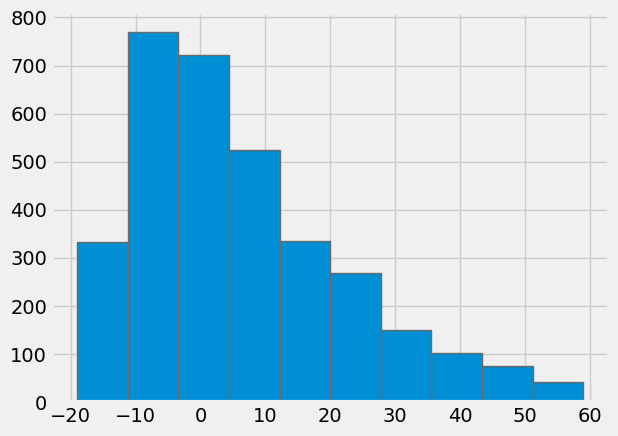

In [183]:
rs['dersTS_3_year_follow_up_y_arm_1'].hist()

array([[<Axes: title={'center': 'rsfmri_var_cdk_entorhinallh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_entorhinalrh'}>]],
      dtype=object)

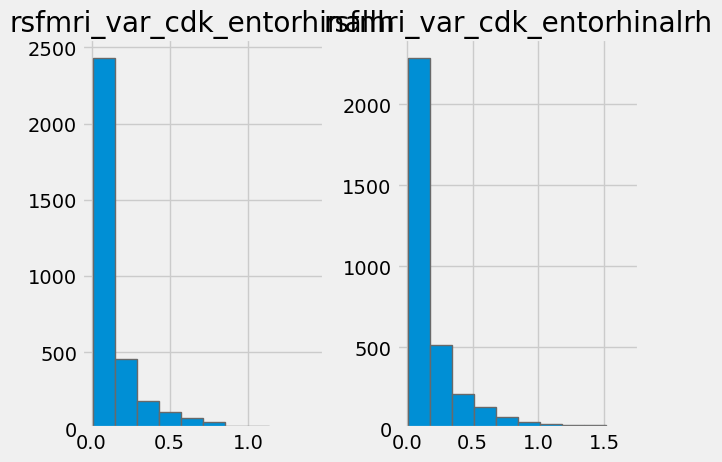

In [150]:
rs[rs.columns[5:7].tolist()].hist()

In [146]:
len(rs.columns[10:19].tolist())

9

array([[<Axes: title={'center': 'rsfmri_var_cdk_insulalh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_insularh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_rlaclatelh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_rlaclaterh'}>],
       [<Axes: title={'center': 'rsfmri_var_cdk_entorhinallh'}>,
        <Axes: title={'center': 'rsfmri_var_cdk_entorhinalrh'}>,
        <Axes: title={'center': 'rsfmri_var_scs_amygdalalh'}>,
        <Axes: title={'center': 'rsfmri_var_scs_amygdalarh'}>]],
      dtype=object)

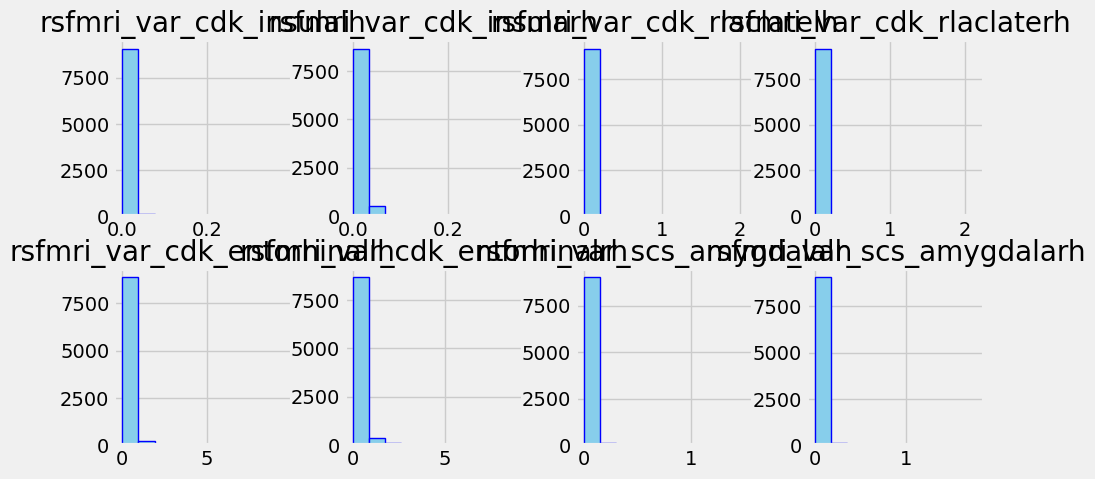

In [210]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
rs[rs.columns[:10].tolist()].hist(ax=ax, color='skyblue', edgecolor='blue')

### Normalize Data

In [19]:
rs[cols_num] = normalize(rs[cols_num], norm="l1")

In [20]:
rs.describe()

,rsfmri_var_cdk_insulalh,rsfmri_var_cdk_insularh,rsfmri_var_cdk_rlaclatelh,rsfmri_var_cdk_rlaclaterh,rsfmri_var_cdk_entorhinallh,rsfmri_var_cdk_entorhinalrh,rsfmri_var_scs_amygdalalh,rsfmri_var_scs_amygdalarh,rsfmri_var_scs_hpuslh,rsfmri_var_scs_hpusrh,rsfmri_var_scs_putamenlh,rsfmri_var_scs_putamenrh,rsfmri_var_scs_tplh,rsfmri_var_scs_tprh,rsfmri_var_scs_ventraldclh,rsfmri_var_scs_ventraldcrh,rsfmri_var_scs_aalh,rsfmri_var_scs_aarh,mrirsfd121,mrirsfd48,mrirsfd122,mrirsfd49,mrirsfd123,mrirsfd47,rsfmri_cor_ngd_sa_scs_aalh,rsfmri_cor_ngd_sa_scs_aarh,rsfmri_cor_ngd_sa_scs_aglh,rsfmri_cor_ngd_sa_scs_agrh,rsfmri_cor_ngd_sa_scs_bs,rsfmri_cor_ngd_sa_scs_cdelh,rsfmri_cor_ngd_sa_scs_cderh,rsfmri_cor_ngd_sa_scs_crcxlh,rsfmri_cor_ngd_sa_scs_crcxrh,rsfmri_cor_ngd_sa_scs_hplh,rsfmri_cor_ngd_sa_scs_hprh,rsfmri_cor_ngd_sa_scs_pllh,rsfmri_cor_ngd_sa_scs_plrh,rsfmri_cor_ngd_sa_scs_ptlh,rsfmri_cor_ngd_sa_scs_ptrh,rsfmri_cor_ngd_sa_scs_thplh,rsfmri_cor_ngd_sa_scs_thprh,rsfmri_cor_ngd_sa_scs_vtdclh,rsfmri_cor_ngd_sa_scs_vtdcrh,rsfmri_cor_ngd_df_scs_aalh,rsfmri_cor_ngd_df_scs_aarh,rsfmri_cor_ngd_df_scs_aglh,rsfmri_cor_ngd_df_scs_agrh,rsfmri_cor_ngd_df_scs_bs,rsfmri_cor_ngd_df_scs_cdelh,rsfmri_cor_ngd_df_scs_cderh,rsfmri_cor_ngd_df_scs_crcxlh,rsfmri_cor_ngd_df_scs_crcxrh,rsfmri_cor_ngd_df_scs_hplh,rsfmri_cor_ngd_df_scs_hprh,rsfmri_cor_ngd_df_scs_pllh,rsfmri_cor_ngd_df_scs_plrh,rsfmri_cor_ngd_df_scs_ptlh,rsfmri_cor_ngd_df_scs_ptrh,rsfmri_cor_ngd_df_scs_thplh,rsfmri_cor_ngd_df_scs_thprh,rsfmri_cor_ngd_df_scs_vtdclh,rsfmri_cor_ngd_df_scs_vtdcrh,rsfmri_c_ngd_sa_ngd_ad,rsfmri_c_ngd_sa_ngd_cgc,rsfmri_c_ngd_sa_ngd_ca,rsfmri_c_ngd_sa_ngd_dt,rsfmri_c_ngd_sa_ngd_dla,rsfmri_c_ngd_sa_ngd_fo,rsfmri_c_ngd_sa_ngd_n,rsfmri_c_ngd_sa_ngd_rspltp,rsfmri_c_ngd_sa_ngd_sa,rsfmri_c_ngd_sa_ngd_smh,rsfmri_c_ngd_sa_ngd_smm,rsfmri_c_ngd_sa_ngd_vta,rsfmri_c_ngd_sa_ngd_vs,dersAWR_3_year_follow_up_y_arm_1,dersAWR_4_year_follow_up_y_arm_1,dersAWR_delta_7wave9
count,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000
mean,0.000436,0.000526,0.001435,0.001339,0.005084,0.006715,0.001221,0.001210,0.000725,0.000679,0.000749,0.000750,0.000345,0.000362,0.000724,0.000715,0.002117,0.002152,0.001447,0.000621,0.000788,0.000967,0.001200,0.001372,0.002720,-0.001509,0.000280,0.000197,0.001468,0.003232,0.007525,0.000489,-0.001887,-0.002053,-0.000141,-0.000934,-0.000065,0.000912,0.000303,0.003378,0.003314,-0.003232,0.001878,0.001509,0.001716,-0.001515,-0.000542,0.003213,-0.001496,-0.001094,-0.000305,0.000234,0.001487,0.001518,0.003081,0.000019,0.000574,-0.001338,0.000047,-0.000714,0.001364,0.001733,0.001101,0.003332,0.002585,0.002008,-0.001160,0.002147,0.000333,-0.002223,0.010434,-0.001551,-0.000759,0.002376,-0.002183,-0.387919,-0.381242,0.006677
std,0.000231,0.000270,0.001264,0.001108,0.008826,0.011530,0.001118,0.001437,0.000420,0.000392,0.000425,0.000391,0.000265,0.000279,0.000583,0.000578,0.003131,0.004504,0.001186,0.000488,0.000528,0.000497,0.000632,0.001768,0.002297,0.002553,0.003683,0.002122,0.002444,0.003045,0.003759,0.002170,0.001921,0.002511,0.003197,0.002321,0.002996,0.002035,0.002213,0.003424,0.001536,0.002217,0.002390

### Correlation Matrix

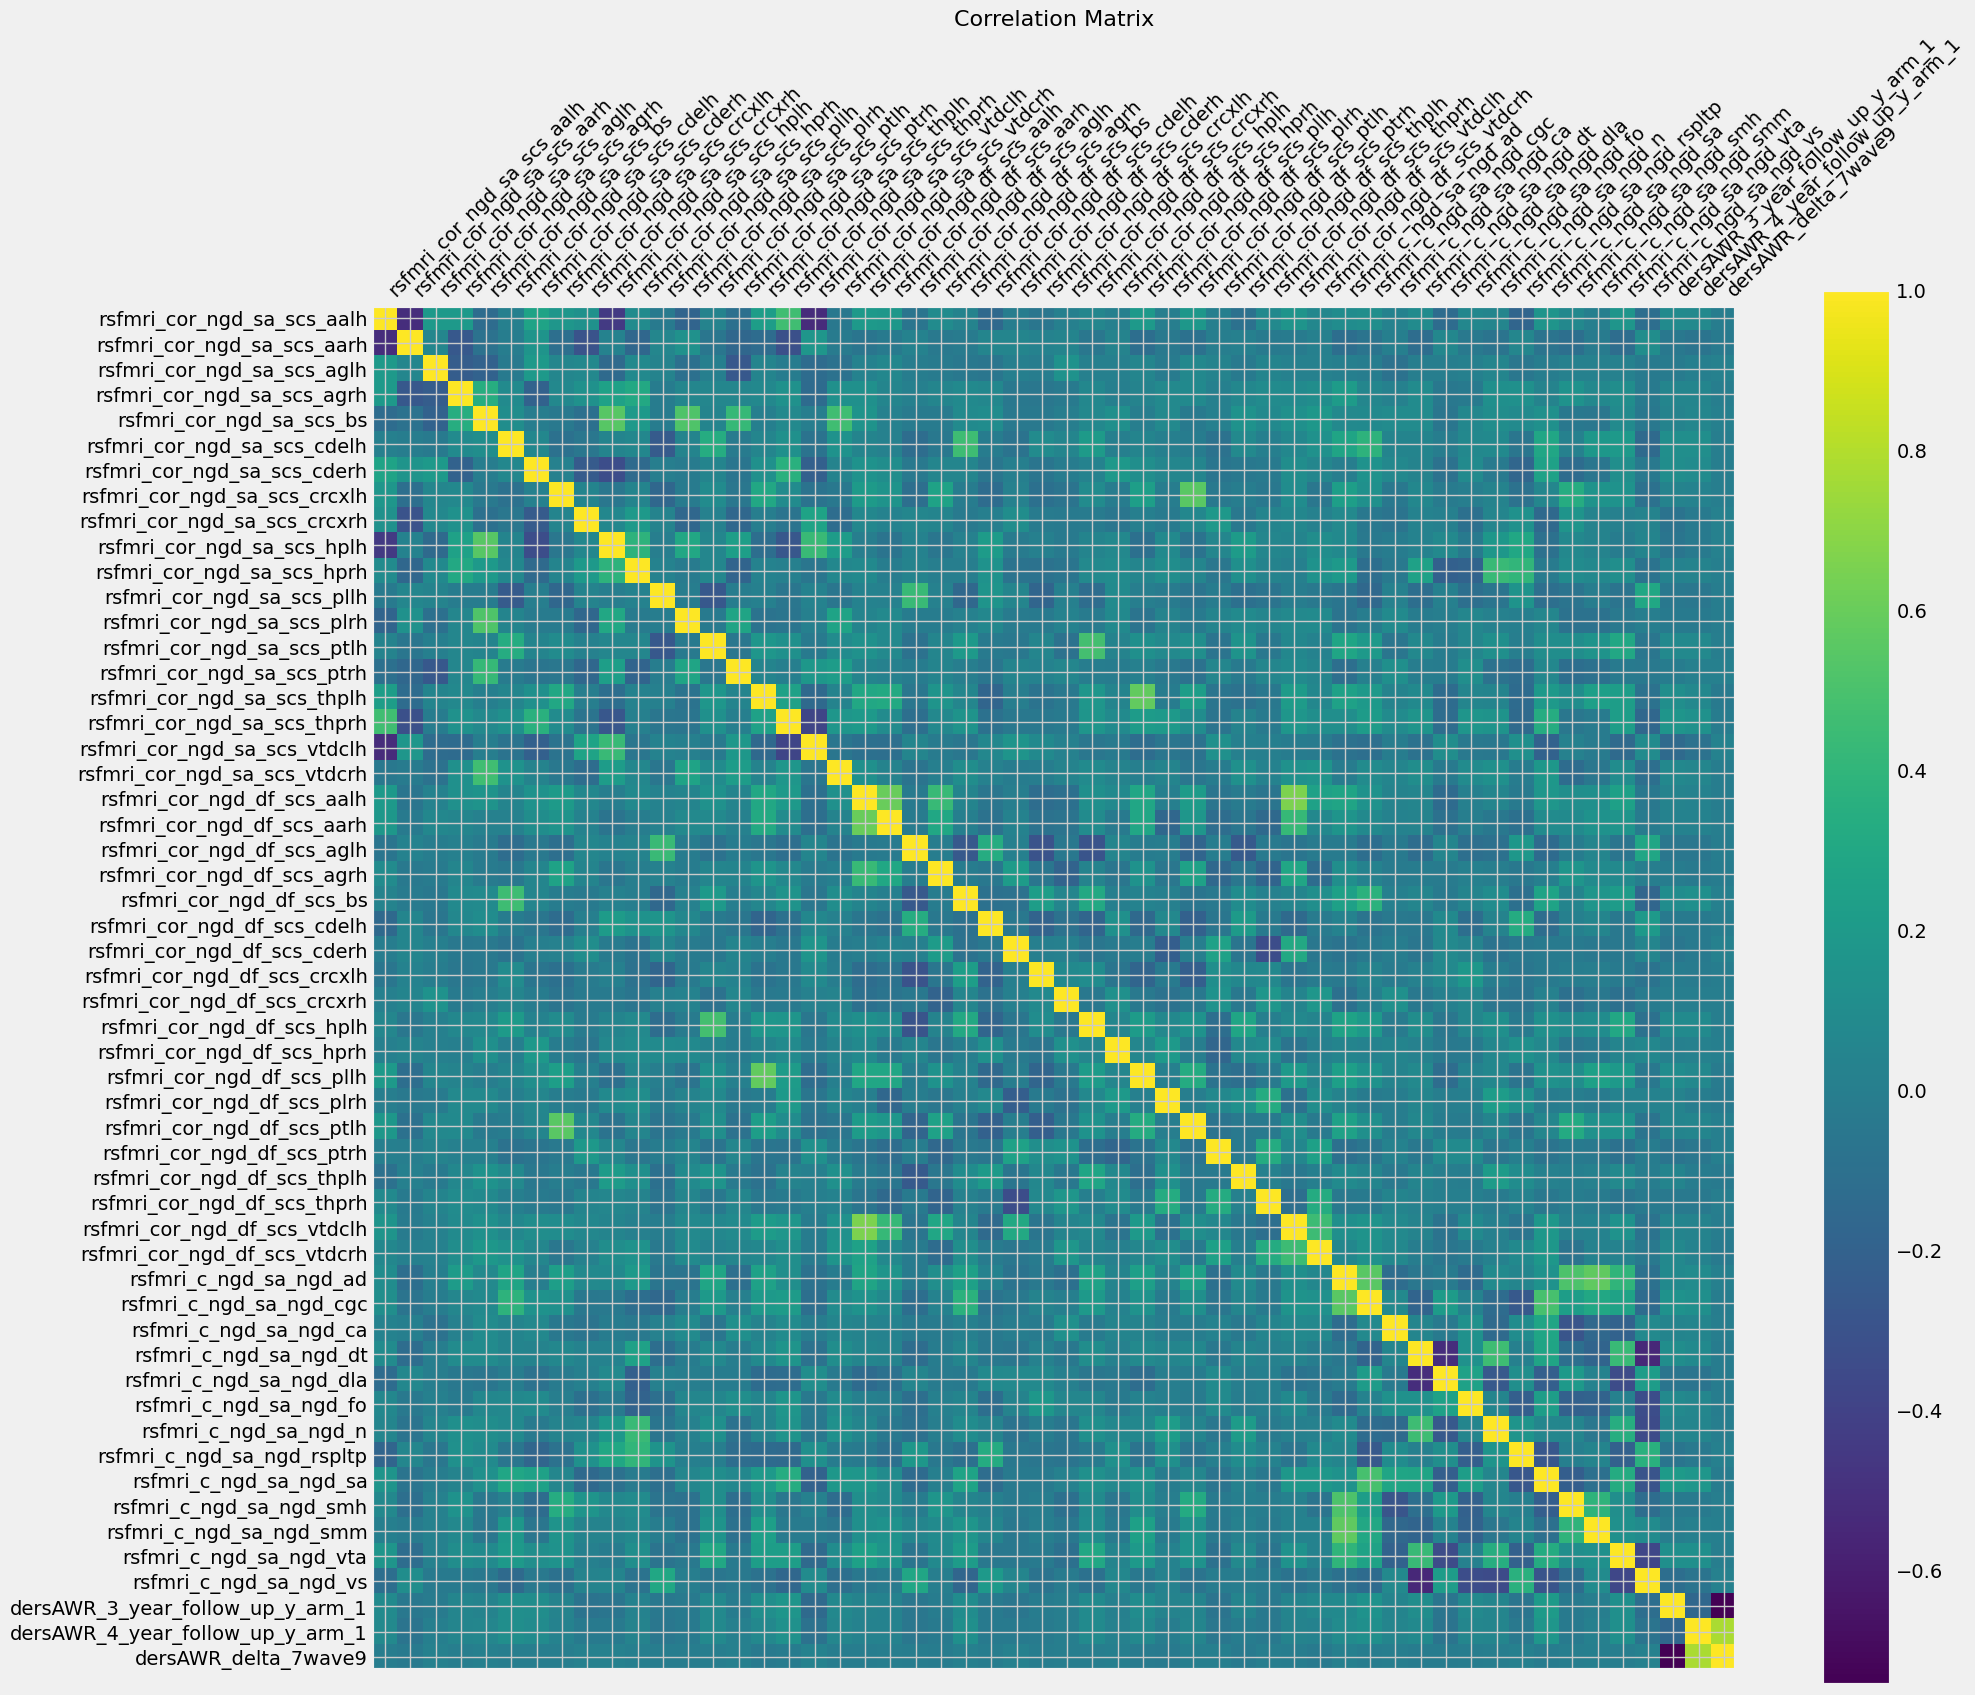


Correlation with 3rd year Awareness Subscale DERS:



dersAWR_3_year_follow_up_y_arm_1    1.000000
rsfmri_c_ngd_sa_ngd_sa              0.203863
rsfmri_cor_ngd_sa_scs_thprh         0.165833
rsfmri_c_ngd_sa_ngd_cgc             0.146173
rsfmri_c_ngd_sa_ngd_vta             0.121886
rsfmri_cor_ngd_sa_scs_thplh         0.120517
rsfmri_cor_ngd_sa_scs_cdelh         0.119154
rsfmri_c_ngd_sa_ngd_dt              0.108032
rsfmri_cor_ngd_sa_scs_cderh         0.107642
rsfmri_cor_ngd_df_scs_pllh          0.103820
rsfmri_cor_ngd_df_scs_bs            0.101638
rsfmri_cor_ngd_df_scs_hplh          0.091886
rsfmri_cor_ngd_sa_scs_aalh          0.089067
rsfmri_c_ngd_sa_ngd_ad              0.083001
rsfmri_cor_ngd_sa_scs_ptlh          0.075975
rsfmri_c_ngd_sa_ngd_fo              0.075466
rsfmri_cor_ngd_df_scs_vtdcrh        0.069016
rsfmri_cor_ngd_sa_scs_vtdcrh        0.067165
rsfmri_cor_ngd_sa_scs_agrh          0.051536
rsfmri_c_ngd_sa_ngd_n               0.051362
rsfmri_c_ngd_sa_ngd_ca              0.045046
rsfmri_cor_ngd_df_scs_thplh         0.044088
rsfmri_cor

In [22]:
tmp_cols = rs_cor_nm
corr_matrix = rs[tmp_cols].corr()#

f = plt.figure(figsize=(22, 18))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45, ha = 'left')
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
col_bar = plt.colorbar()
col_bar.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
print('\nCorrelation with 3rd year Awareness Subscale DERS:\n')
corr_matrix.sort_values('dersAWR_3_year_follow_up_y_arm_1', ascending=False)['dersAWR_3_year_follow_up_y_arm_1']

In [23]:
# rsfmri_c_ngd_sa_ngd_rspitp
# rsfmri_c_ngd_rspltp_ngd_sa
colc = 'dersAWR_delta_7wave9'
print('\nCorrelation with {}:\n'.format(colc))
corr_matrix.sort_values(colc, ascending=False)[colc]


Correlation with dersAWR_delta_7wave9:



dersAWR_delta_7wave9                1.000000
dersAWR_4_year_follow_up_y_arm_1    0.781219
rsfmri_cor_ngd_sa_scs_vtdclh        0.030050
rsfmri_cor_ngd_sa_scs_crcxrh        0.024881
rsfmri_c_ngd_sa_ngd_vs              0.024025
rsfmri_cor_ngd_sa_scs_hplh          0.021369
rsfmri_cor_ngd_df_scs_cderh         0.021243
rsfmri_cor_ngd_sa_scs_aglh          0.020271
rsfmri_cor_ngd_df_scs_bs            0.018044
rsfmri_cor_ngd_sa_scs_ptrh          0.017184
rsfmri_cor_ngd_sa_scs_bs            0.016835
rsfmri_c_ngd_sa_ngd_rspltp          0.015623
rsfmri_c_ngd_sa_ngd_ad              0.012692
rsfmri_c_ngd_sa_ngd_smm             0.010881
rsfmri_cor_ngd_df_scs_ptrh          0.010568
rsfmri_cor_ngd_sa_scs_hprh          0.006385
rsfmri_cor_ngd_df_scs_ptlh          0.006013
rsfmri_cor_ngd_df_scs_hprh          0.005920
rsfmri_c_ngd_sa_ngd_vta             0.005163
rsfmri_cor_ngd_sa_scs_cdelh         0.005124
rsfmri_cor_ngd_sa_scs_ptlh          0.005069
rsfmri_c_ngd_sa_ngd_ca              0.004130
rsfmri_c_n

### Split data for Training/Validation and Test
* rs_train_val will be split further during 5fold cross validation 

In [24]:
rs.shape

(4079, 80)

In [58]:
rs_cor_nm

['rsfmri_cor_ngd_sa_scs_aalh',
 'rsfmri_cor_ngd_sa_scs_aarh',
 'rsfmri_cor_ngd_sa_scs_aglh',
 'rsfmri_cor_ngd_sa_scs_agrh',
 'rsfmri_cor_ngd_sa_scs_bs',
 'rsfmri_cor_ngd_sa_scs_cdelh',
 'rsfmri_cor_ngd_sa_scs_cderh',
 'rsfmri_cor_ngd_sa_scs_crcxlh',
 'rsfmri_cor_ngd_sa_scs_crcxrh',
 'rsfmri_cor_ngd_sa_scs_hplh',
 'rsfmri_cor_ngd_sa_scs_hprh',
 'rsfmri_cor_ngd_sa_scs_pllh',
 'rsfmri_cor_ngd_sa_scs_plrh',
 'rsfmri_cor_ngd_sa_scs_ptlh',
 'rsfmri_cor_ngd_sa_scs_ptrh',
 'rsfmri_cor_ngd_sa_scs_thplh',
 'rsfmri_cor_ngd_sa_scs_thprh',
 'rsfmri_cor_ngd_sa_scs_vtdclh',
 'rsfmri_cor_ngd_sa_scs_vtdcrh',
 'rsfmri_cor_ngd_df_scs_aalh',
 'rsfmri_cor_ngd_df_scs_aarh',
 'rsfmri_cor_ngd_df_scs_aglh',
 'rsfmri_cor_ngd_df_scs_agrh',
 'rsfmri_cor_ngd_df_scs_bs',
 'rsfmri_cor_ngd_df_scs_cdelh',
 'rsfmri_cor_ngd_df_scs_cderh',
 'rsfmri_cor_ngd_df_scs_crcxlh',
 'rsfmri_cor_ngd_df_scs_crcxrh',
 'rsfmri_cor_ngd_df_scs_hplh',
 'rsfmri_cor_ngd_df_scs_hprh',
 'rsfmri_cor_ngd_df_scs_pllh',
 'rsfmri_cor_ngd_df_scs_p

In [25]:
# split off 20% of data, that the model is **not** trained or validated on, for the final test
rs_train_val, rs_test = train_test_split(rs, train_size = 0.8, random_state=7799)
print('Set Sizes:\n  Training & Validation: {0}\n  Testing: {1}'.format(rs_train_val.shape[0], rs_test.shape[0]))

Set Sizes:
  Training & Validation: 3263
  Testing: 816


## Machine Learning
* to predict Emotional regulation, operationalized as DERS total score, using resting state fMRI activity

In [26]:

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))


In [27]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Specifiy predictor and target variables

In [43]:
cols_stry = ['src_subject_id', 'eventname', 'dersAWR_4_year_follow_up_y_arm_1', 'dersAWR_3_year_follow_up_y_arm_1', 'dersAWR_delta_7wave9']
rs_train, rs_val = train_test_split(rs_train_val, train_size = 0.8, random_state=7799)
X_train = rs_train.drop(cols_stry, axis=1)
Y_train = rs_train['dersAWR_3_year_follow_up_y_arm_1']
print(X_train.shape)
print(Y_train.shape)

(2610, 75)
(2610,)


In [46]:
X_val = rs_val.drop(cols_stry, axis=1)
Y_val = rs_val['dersAWR_3_year_follow_up_y_arm_1']
y_pred = rf.predict(X_val)

In [45]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [57]:

# rf.score(X_val, Y_val)

Index(['rsfmri_var_cdk_insulalh', 'rsfmri_var_cdk_insularh', 'rsfmri_var_cdk_rlaclatelh', 'rsfmri_var_cdk_rlaclaterh', 'rsfmri_var_cdk_entorhinallh', 'rsfmri_var_cdk_entorhinalrh', 'rsfmri_var_scs_amygdalalh', 'rsfmri_var_scs_amygdalarh', 'rsfmri_var_scs_hpuslh', 'rsfmri_var_scs_hpusrh', 'rsfmri_var_scs_putamenlh', 'rsfmri_var_scs_putamenrh', 'rsfmri_var_scs_tplh', 'rsfmri_var_scs_tprh', 'rsfmri_var_scs_ventraldclh', 'rsfmri_var_scs_ventraldcrh', 'rsfmri_var_scs_aalh', 'rsfmri_var_scs_aarh',
       'mrirsfd121', 'mrirsfd48', 'mrirsfd122', 'mrirsfd49', 'mrirsfd123', 'mrirsfd47', 'rsfmri_cor_ngd_sa_scs_aalh', 'rsfmri_cor_ngd_sa_scs_aarh', 'rsfmri_cor_ngd_sa_scs_aglh', 'rsfmri_cor_ngd_sa_scs_agrh', 'rsfmri_cor_ngd_sa_scs_bs', 'rsfmri_cor_ngd_sa_scs_cdelh', 'rsfmri_cor_ngd_sa_scs_cderh', 'rsfmri_cor_ngd_sa_scs_crcxlh', 'rsfmri_cor_ngd_sa_scs_crcxrh', 'rsfmri_cor_ngd_sa_scs_hplh', 'rsfmri_cor_ngd_sa_scs_hprh', 'rsfmri_cor_ngd_sa_scs_pllh', 'rsfmri_cor_ngd_sa_scs_plrh',
       'rsfmri_cor_ng

In [48]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_val, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_val, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(Y_val, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(Y_val, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(Y_val, y_pred))
print('Max Error:', metrics.max_error(Y_val, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(Y_val, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(Y_val, y_pred))
print('R^2:', metrics.r2_score(Y_val, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(Y_val, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(Y_val, y_pred))

Mean Absolute Error (MAE): 0.041329815606038836
Mean Squared Error (MSE): 0.003156625398940572
Root Mean Squared Error (RMSE): 0.05618385354299376
Mean Absolute Percentage Error (MAPE): 0.13180607178099268
Explained Variance Score: 0.12539107993683085
Max Error: 0.2638006610567359
Median Absolute Error: 0.031889522708234475
R^2: 0.12533626196141467


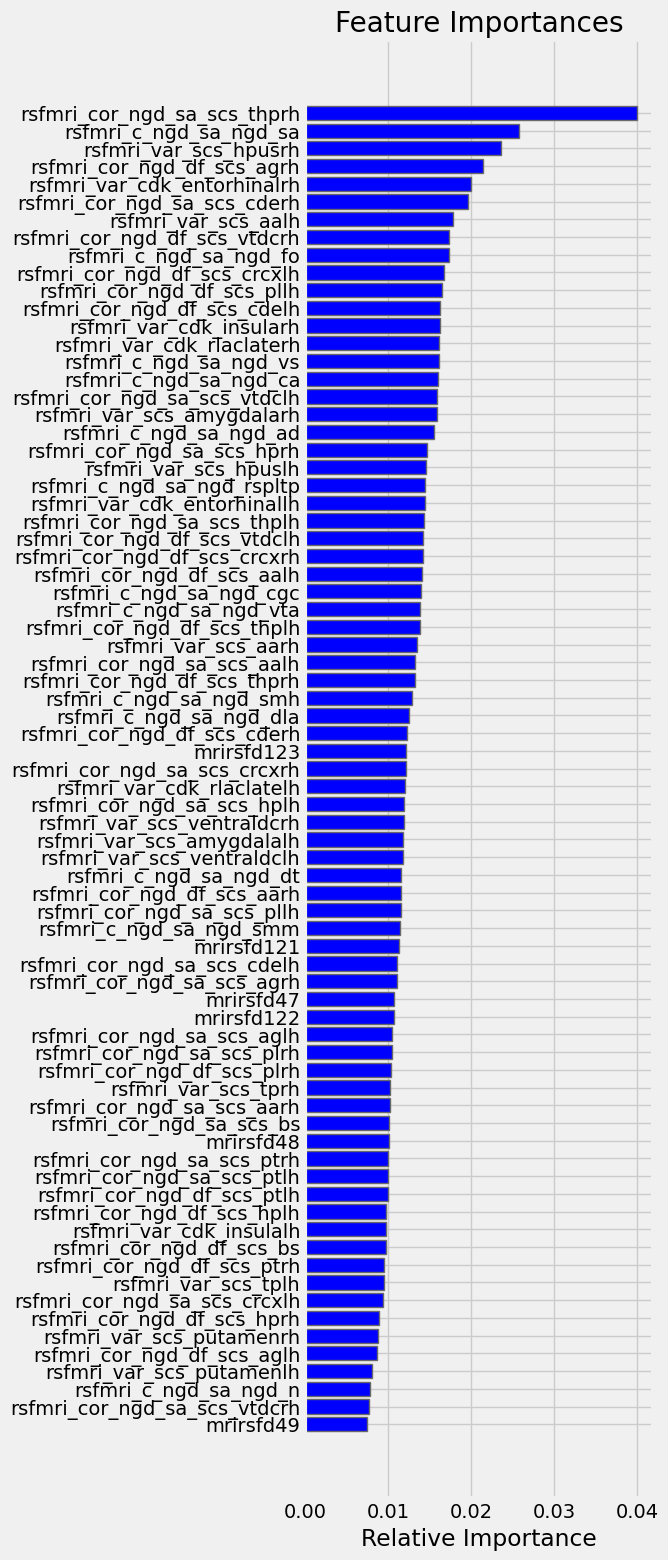

In [51]:
plt.figure(figsize=(4, 18))
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Delta Emotion Regulation Target

In [52]:
cols_stry = ['src_subject_id', 'eventname', 'dersAWR_4_year_follow_up_y_arm_1', 'dersAWR_3_year_follow_up_y_arm_1', 'dersAWR_delta_7wave9']
rs_train, rs_val = train_test_split(rs_train_val, train_size = 0.8, random_state=7799)
X_train = rs_train.drop(cols_stry, axis=1)
Y_train = rs_train['dersAWR_delta_7wave9']
print(X_train.shape)
print(Y_train.shape)

(2610, 75)
(2610,)


In [53]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [54]:
X_val = rs_val.drop(cols_stry, axis=1)
Y_val = rs_val['dersAWR_delta_7wave9']
y_pred = rf.predict(X_val)

In [55]:

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(Y_val, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(Y_val, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(Y_val, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(Y_val, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(Y_val, y_pred))
print('Max Error:', metrics.max_error(Y_val, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(Y_val, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(Y_val, y_pred))
print('R^2:', metrics.r2_score(Y_val, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(Y_val, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(Y_val, y_pred))

Mean Absolute Error (MAE): 0.07091671322766042
Mean Squared Error (MSE): 0.009228936620375824
Root Mean Squared Error (RMSE): 0.09606735460277764
Mean Absolute Percentage Error (MAPE): 11490207313836.307
Explained Variance Score: -0.009631230392013856
Max Error: 0.32941871311183785
Median Absolute Error: 0.05424203673206489
R^2: -0.00969489393480294


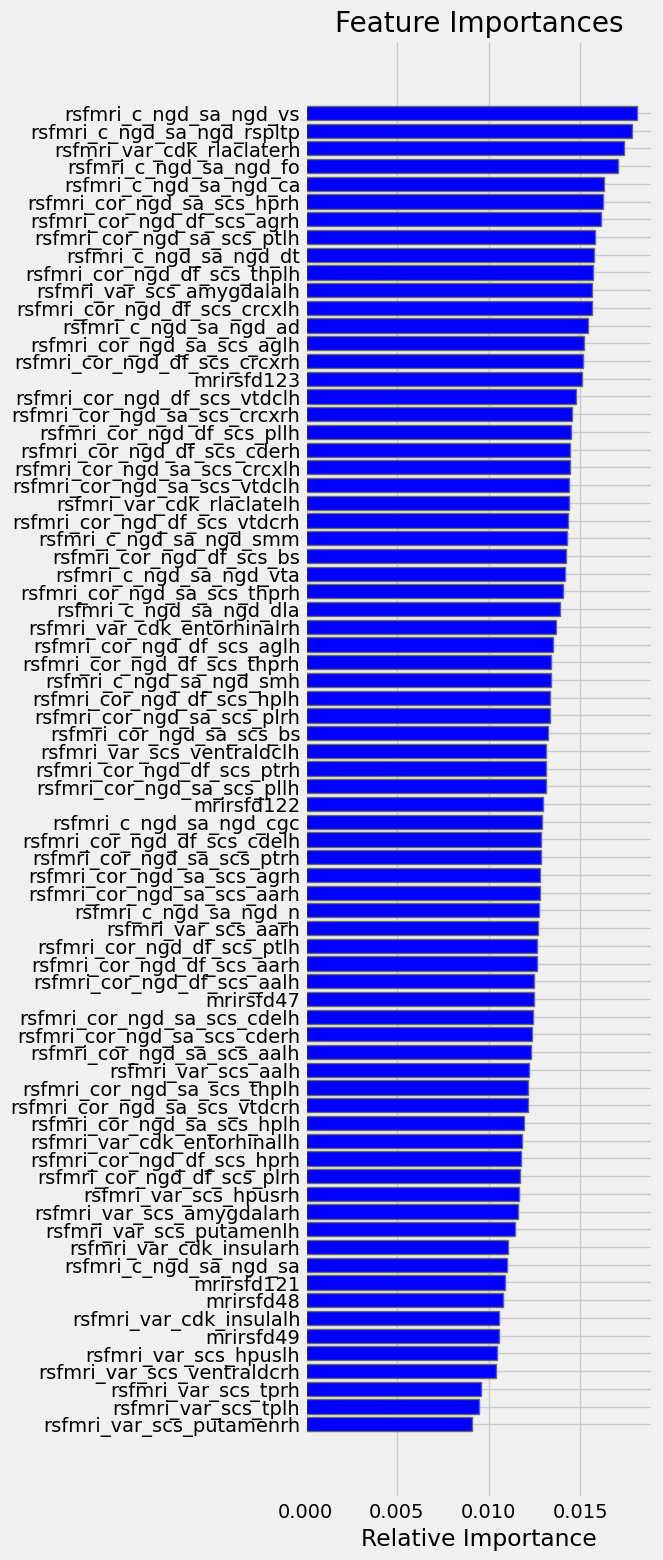

In [56]:
plt.figure(figsize=(4, 18))
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

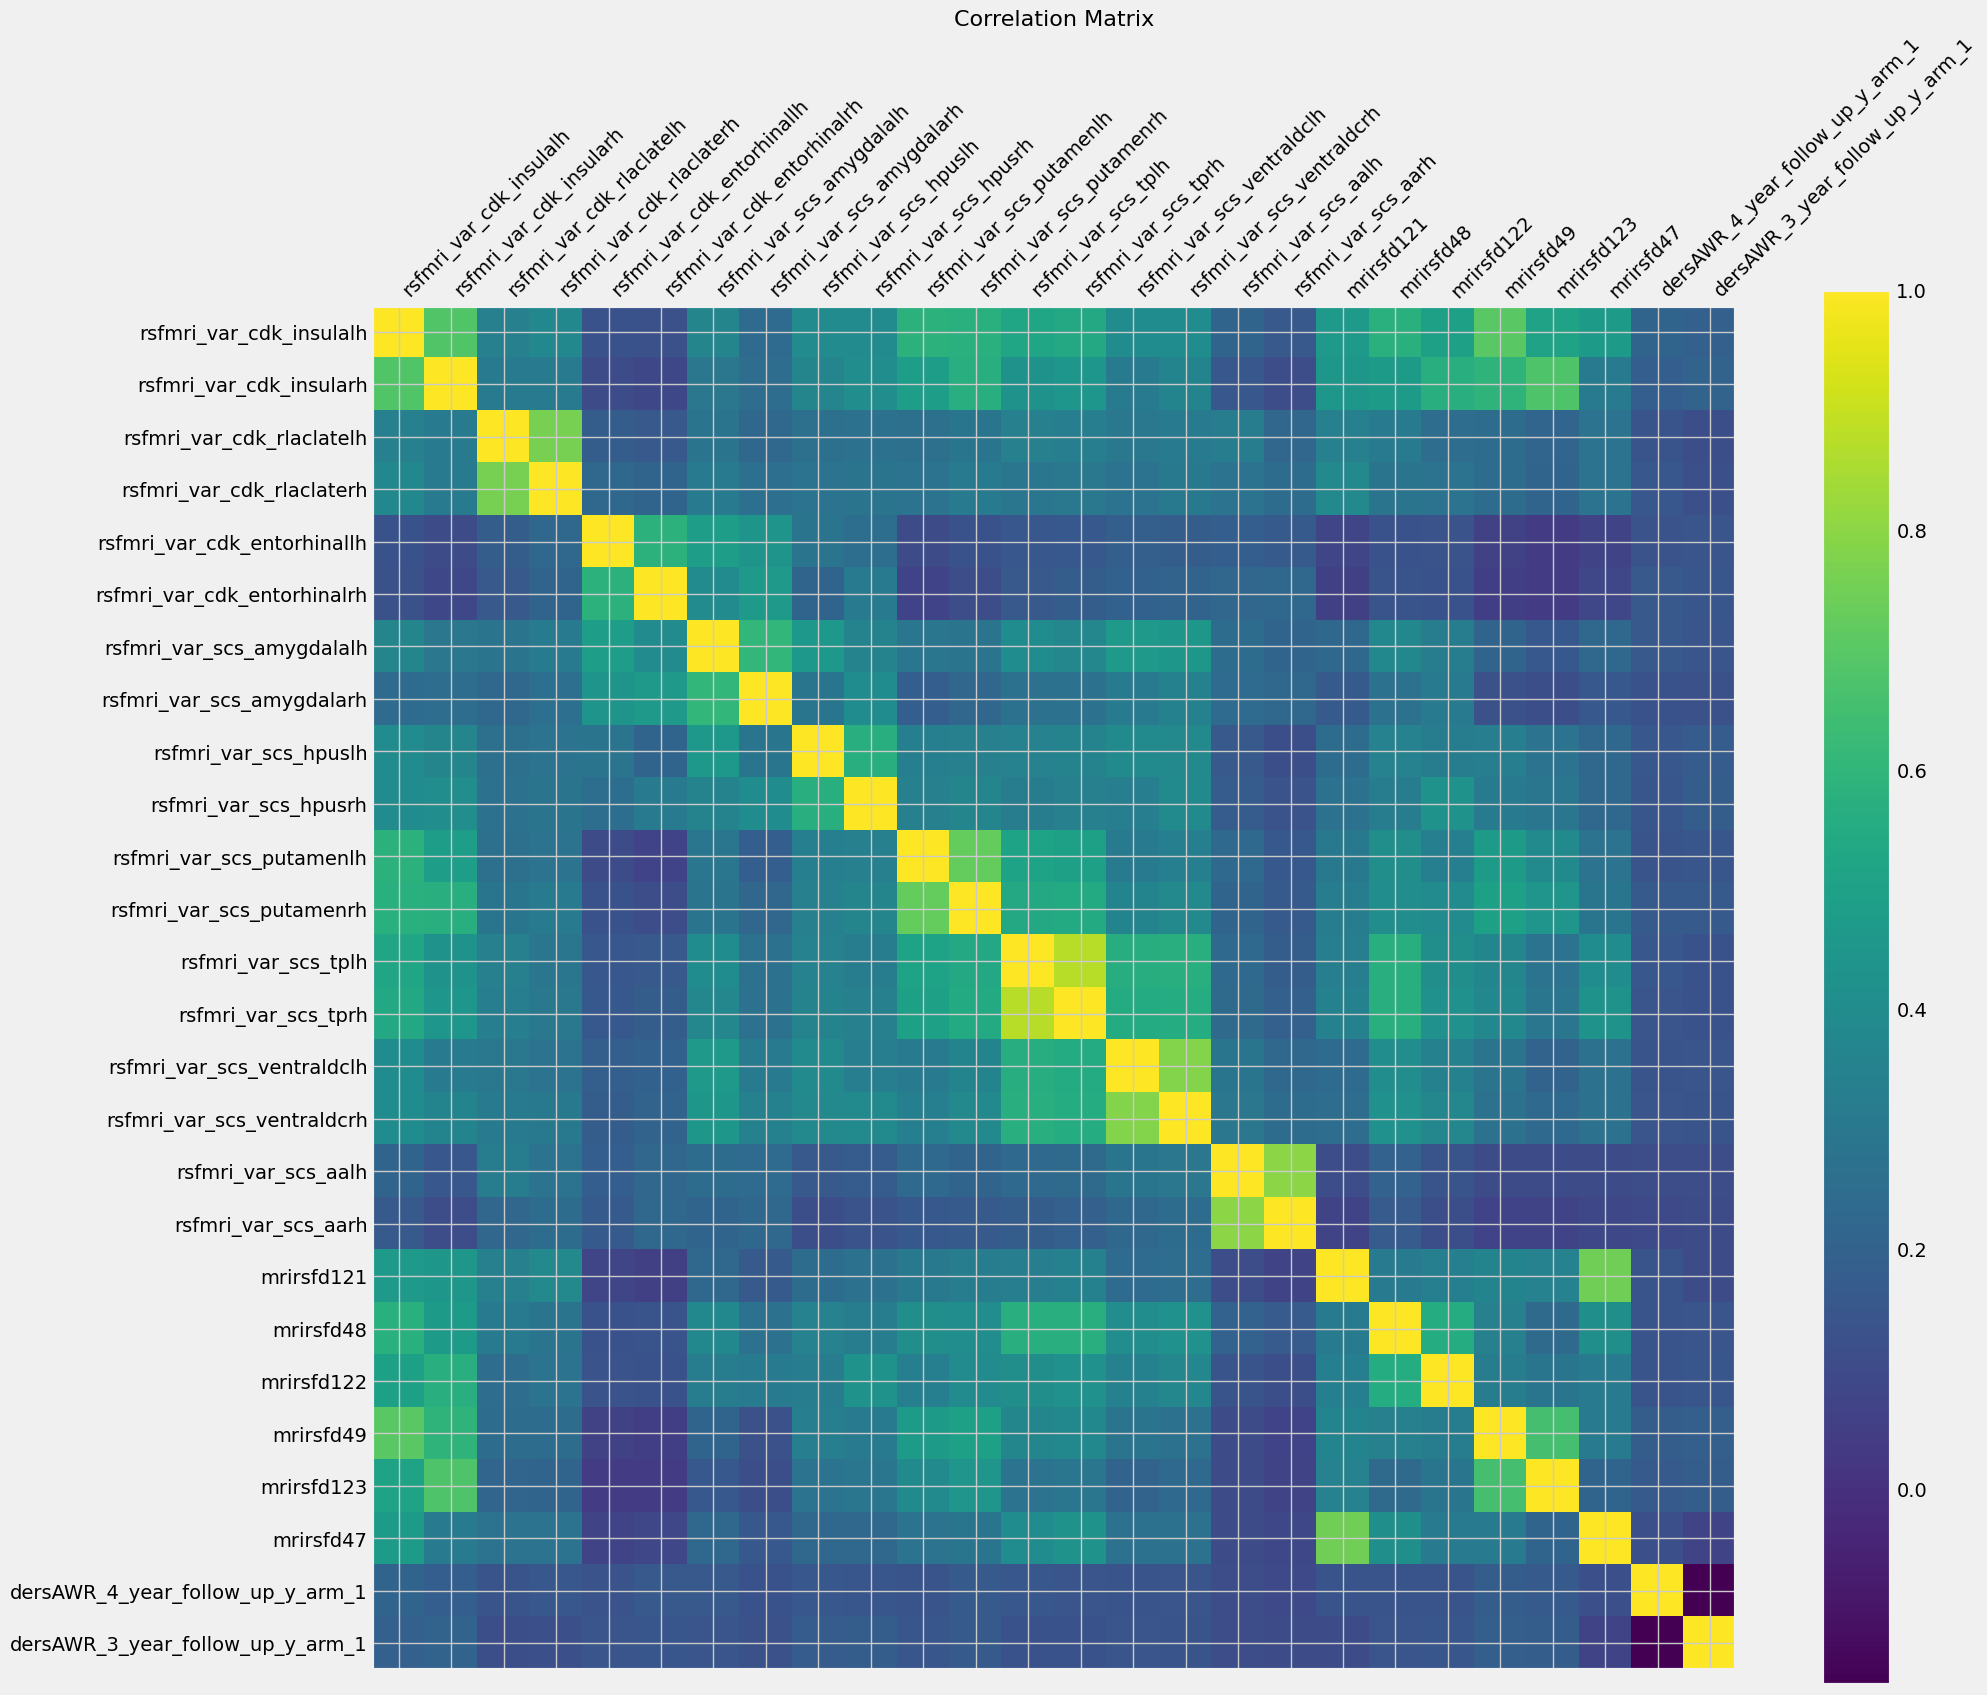


Correlation with 3rd year Awareness Subscale DERS:



dersAWR_3_year_follow_up_y_arm_1    1.000000
rsfmri_var_cdk_insularh             0.205336
rsfmri_var_cdk_insulalh             0.190636
mrirsfd49                           0.190505
mrirsfd123                          0.180968
rsfmri_var_scs_hpusrh               0.178243
rsfmri_var_scs_hpuslh               0.173442
rsfmri_var_scs_putamenrh            0.165491
rsfmri_var_scs_putamenlh            0.148920
mrirsfd122                          0.146315
rsfmri_var_cdk_entorhinalrh         0.145109
rsfmri_var_cdk_entorhinallh         0.142998
mrirsfd48                           0.142041
rsfmri_var_scs_ventraldclh          0.141041
rsfmri_var_scs_amygdalalh           0.140788
rsfmri_var_scs_ventraldcrh          0.136104
rsfmri_var_scs_tprh                 0.129416
rsfmri_var_scs_tplh                 0.128723
rsfmri_var_scs_amygdalarh           0.124087
rsfmri_var_cdk_rlaclaterh           0.120381
rsfmri_var_cdk_rlaclatelh           0.117617
rsfmri_var_scs_aalh                 0.111728
rsfmri_var

In [60]:
tmp_cols = rs_var_nm + ['dersAWR_4_year_follow_up_y_arm_1', 'dersAWR_3_year_follow_up_y_arm_1']
corr_matrix = rs[tmp_cols].corr()#

f = plt.figure(figsize=(22, 18))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45, ha = 'left')
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
col_bar = plt.colorbar()
col_bar.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
print('\nCorrelation with 3rd year Awareness Subscale DERS:\n')
corr_matrix.sort_values('dersAWR_3_year_follow_up_y_arm_1', ascending=False)['dersAWR_3_year_follow_up_y_arm_1']

In [ ]:
rf = Class_Fit(clf = RandomForestRegressor)
param_grid = {'criterion' : ['squared_error', 'poisson'], 'max_depth' : [3, 5, 8]}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

In [ ]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 2, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])